# Naive Bayesian - Gaussian

- Logistic Regression and Naive Bayesian are two baseline algorithm for classification
- Baselines mean they serve like theminimum
- when youdo classifivcation, it's a no brainer to use Logistic Regression and Naive 
    - they are so simple yet so effective
- **key idea for GNB**: use the normal distribution to estimate y

$$
P(y|x) = \frac{P(x|y)P(y)}{P(x)}
$$

In previous class, you estimate $P(y | x)$ directly using gradient descent.

But we can do another way, that is, using Naive Baye Algorithm, i.e., if we can find $P(x | y)$, then we can find $P(y | x)$ ==> Genearative Algorithms

So we can ask something like this right, e.g., $P(y | x = 4)$ ==> 

$$P(y = class 1 | x =4)$$ 
$$P(y = class 2 | x =4)$$
and so on....

$$\frac{P(x|y = class 1)P(y = class 1)}{P(x)}$$
$$\frac{P(x|y = class 2)P(y = class 2)}{P(x)}$$
and so on....

We can ignore $P(x)$, and compare only the numerator (top guy)
$${P(x|y = class 1)P(y = class 1)}$$
$${P(x|y = class 2)P(y = class 2)}$$

So we have two components here, the easy line is $P(y = class 1)$ and $P(y = class 2)$, they are 
$$P(y = 1) = \frac{\Sigma_{i=1}^m 1(y=1)}{m}$$
$$P(y = 0) = \frac{\Sigma_{i=1}^m 1(y=0)}{m}$$

Now the question is the left part, which is $P(x|y = class1), How to find?

Answer: not easy!

Naive answer: assume $P(x|y)$ follow some statistical distribution

- if your x is continuous, you can assume Gaussian distribution 
- if your x is discrete, you can assume use Multinomial distribution

In [27]:
import numpy as np

X_train = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12],
    [11,12,13]
    ])
# print(X_train.shape)
y_train = np.array([0,0,0,1,1])

m0 = len(y_train[y_train==0])
m1 = len(y_train[y_train==1])
m = len(y_train)

#simple exercise: find P(y=0), P(y=1) ==> priors
prior0 = m0/m
prior1 = m1/m

print('Prior 0', prior0)
print('Prior 1', prior1)

Prior 0 0.6
Prior 1 0.4


In [13]:
#I want to find P(x|y = 0), P(x|y=1)
#to make it, we need the normal distribution
#before we have the normal distribtuion, we need to find the mean and std

#mean of each class of each feature
#std of each class of each feature

#mean.shape : (k,n) or (n,k) #here k = #class, n = #features
#std.shape : (k,n)

#please find these mean and std

np.mean(X_train,axis=1)

np.std(X_train,axis=1)

array([0.81649658, 0.81649658, 0.81649658, 0.81649658, 0.81649658])

In [39]:
def mean_std(X,y,k):
    #create empty mean and std:
    n = X.shape[1]
    mean = np.zeros((k,n))
    std = np.zeros((k,n))
    #for loop, loop each condition
    for label in range(k):
        mean[label,:] = np.mean(X[y==label],axis=0)
        std[label,:] = np.std(X[y==label],axis=0)
    return mean, std

mean, std = mean_std(X_train,y_train,2)
print("Mean",mean) 
print("Std",std)
mean.shape,std.shape
#6 normal distributions 

Mean [[ 4.   5.   6. ]
 [10.5 11.5 12.5]]
Std [[2.44948974 2.44948974 2.44948974]
 [0.5        0.5        0.5       ]]


((2, 3), (2, 3))

In [40]:
#For mean
#(1+4+7)/3 (2+5+8)/5 (3+6+9)/6 for class 1
#(10+11)/2 (11+12)/2 (12+13)/2 for class 2

#we can now create the normal distribution - pdf - probability density function

$$ P(x \mid y=1 ; \mu_1, \sigma_1^{2}) = \frac{1}{\sqrt{2\pi\sigma_1^{2}}}e ^{-\frac{(x-\mu_1)^{2}}{2\sigma_1^{2}}}$$
$$ P(x \mid y=0 ; \mu_0, \sigma_0^{2}) = \frac{1}{\sqrt{2\pi\sigma_0^{2}}}e ^{-\frac{(x-\mu_0)^{2}}{2\sigma_0^{2}}}$$

In [101]:
#1. create a function called gaussian_pdf(X_test, mean, std)
#    return the probability
#Note that this mean and std COMES FROM training set
#but when we predict, we use X_test
def gaussian_pdf(X_test, mean, std):
    left = 1/(np.sqrt(2*np.pi)*std)
    power = (X_test - mean)**2/(2*std**2)
    return left * np.exp(-power)

#2. create some X_test, and try to predict the y
X_test = np.array([
    [11,12,13],
    [1,2,5],
    [10,1,2]
    ])

pdf0 = gaussian_pdf(X_test,mean[0],std[0]) 
pdf1 = gaussian_pdf(X_test,mean[1],std[1]) 

print(pdf0) 
#m,n
#0.0081087 is the probability of sample1 of feature 1 for class0
#00.0.07693316  is the probability of sample2 of feature 1 for class0
#interpret: sample 2 has a much higher probability to become class0
print(pdf1)
#interpret: sample 1 has a much higher probability to become class1

[[0.00274451 0.00274451 0.00274451]
 [0.07693316 0.07693316 0.14984534]
 [0.0081087  0.04293141 0.04293141]]
[[4.83941449e-01 4.83941449e-01 4.83941449e-01]
 [3.24927207e-79 3.24927207e-79 1.10614191e-49]
 [4.83941449e-01 1.38040588e-96 1.38040588e-96]]


#This is the naive part, which assumes that each feature ate independent
#thus the fnial probability is simple multipilication of it (principle of IID)

$$P(x \mid y) = \prod_{i=1}^n P( x_i \mid y )$$

In [102]:
total_likelihood0 = np.prod(pdf0,axis=1)
total_likelihood1 = np.prod(pdf1,axis=1)

print(total_likelihood0)
print(total_likelihood1)

[2.06726389e-08 8.86891295e-04 1.49451837e-05]
[1.13338761e-001 1.16783908e-206 9.22160306e-193]


$${P(x|y = class 1)P(y = class 1)}$$
$${P(x|y = class 2)P(y = class 2)}$$

In [103]:
posterior0 = prior0*total_likelihood0
posterior1 = prior1*total_likelihood1

print(posterior0)
print(posterior1)

[1.24035833e-08 5.32134777e-04 8.96711022e-06]
[4.53355045e-002 4.67135631e-207 3.68864122e-193]


In [105]:
yhat = 1 * (posterior1 > posterior0)

yhat

array([1, 0, 0])

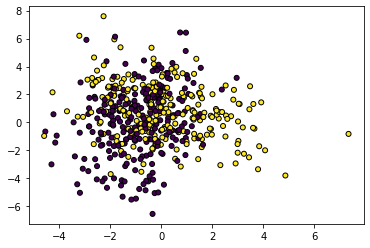

In [1]:
#Exercise:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=7,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

#1. load the data (done!)
#2. act like you do EDA (done!)

#3. split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

#4.preprocess - clean (no need), standardize
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 10), (150, 10), (350,), (150,))

In [148]:
class GNB():
    def __init__(self):
        pass

    def _prior(self,y_train):
        m0 = len(y_train[y_train==0])
        m1 = len(y_train[y_train==1])
        m = len(y_train)
        prior0 = m0/m
        prior1 = m1/m
        return prior0, prior1

    def _mean_std(self,X_train,y_train,k):
        #create empty mean and std:
        n = X_train.shape[1]
        mean = np.zeros((k,n))
        std = np.zeros((k,n))
        #for loop, loop each condition
        for label in range(k):
            mean[label,:] = np.mean(X_train[y_train==label],axis=0)
            std[label,:] = np.std(X_train[y_train==label],axis=0)
        return mean, std

    def _gaussian_pdf(self,X_test, mean, std):
        left = 1/(np.sqrt(2*np.pi)*std)
        power = (X_test - mean)**2/(2*std**2)
        return left * np.exp(-power)

    def predict(self,X_test):
        likelihood0 = self._gaussian_pdf(X_test,self.mean[0,:],self.std[0,:]) 
        likelihood1 = self._gaussian_pdf(X_test,self.mean[1,:],self.std[1,:]) 

        total_likelihood0 = np.prod(likelihood0,axis=1)
        total_likelihood1 = np.prod(likelihood1,axis=1)

        posterior0 = prior0 * total_likelihood0
        posterior1 = prior1 * total_likelihood1
        
        y_pred = 1 * (posterior1 > posterior0)
        return y_pred


    def fit(self,X_train,y_train):
        k = len(set(y_train))
        # print(k)
        self.mean, self.std = self._mean_std(X_train,y_train,k)
        self.prior0,self.prior1 = self._prior(y_train)

In [152]:
#5. apply the naive bay algorithm (make it into a class)
    #fit(), predict()
model = GNB()
model.fit(X_train,y_train)
#6. predict with X_test
yhat = model.predict(X_test)

yhat

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [154]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
accuracy_score(y_test,yhat)

0.7933333333333333

In [155]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        78
           1       0.84      0.71      0.77        72

    accuracy                           0.79       150
   macro avg       0.80      0.79      0.79       150
weighted avg       0.80      0.79      0.79       150



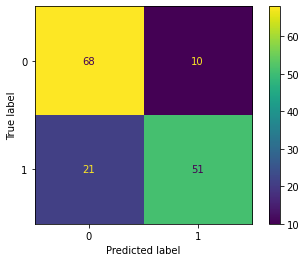

In [161]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,yhat)

cmd = ConfusionMatrixDisplay(cm,display_labels=[0,1])
cmd.plot()

The proof is as follows:

- the probabilty of two events x and y happening, $P(x \cap y)$ is the probability of $x$ or $P(x)$, times the probability of $y$ given that $P(x)$ has occured, $P(y \mid x)$

$$ P(x \cap y) = P(x)P(y \mid x)$$

- on the other hand, the probability of $x$ and $y$ is also equal to the probability of $y$ timese the probabilty of $x$ given $y$

$$ P(x \cap y) = P(y)P(x \mid y)$$

- Equating the two yields:

$$ P(x)P(y \mid x) = P(y)P(x \mid y)$$

- Thus

$$ P(y \mid x) = \frac{P(y)P(x \mid y)}{P(x)}$$

$$ P(x \mid y=1 ; \mu_1, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu_1)^{2}}{2\sigma^{2}}}$$
$$ P(x \mid y=0 ; \mu_0, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu_0)^{2}}{2\sigma^{2}}}$$